In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from keras import layers
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
y_train = y_train.ravel()

In [34]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [35]:
def plot_by_index(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

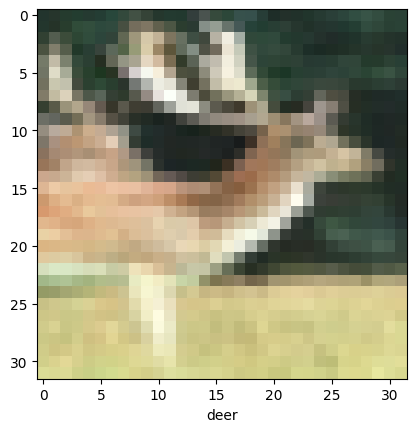

In [36]:
plot_by_index(x_train,y_train,12511)

In [37]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

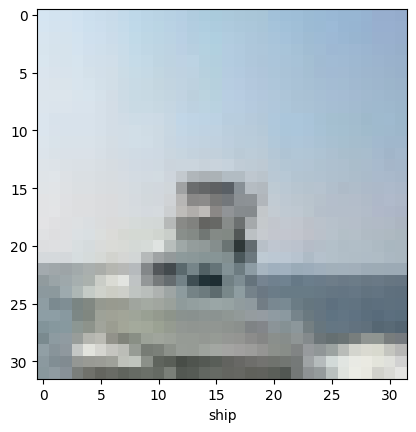

In [38]:
plot_by_index(x_train_scaled, y_train, 100)

In [39]:
from keras.layers import Dense, Flatten
from keras import Sequential

In [40]:
x_train[0].shape

(32, 32, 3)

In [41]:
model = Sequential()

model.add(Flatten(input_shape=x_train[0].shape))
model.add(Dense(3000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_9 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_10 (Dense)            (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5


1563/1563 [==============================] - 24s 14ms/step - loss: 1.8757 - accuracy: 0.3209
Epoch 2/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6972 - accuracy: 0.3906
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6232 - accuracy: 0.4193
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5694 - accuracy: 0.4389
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5336 - accuracy: 0.4545


In [51]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_15 (Dense)            (None, 64)               

In [52]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
cnn.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7705 - accuracy: 0.7336
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7245 - accuracy: 0.7477
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6867 - accuracy: 0.7607
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6431 - accuracy: 0.7743
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6065 - accuracy: 0.7892
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5728 - accuracy: 0.8009
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5395 - accuracy: 0.8109
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5091 - accuracy: 0.8202
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.4781 - accuracy: 0.8319
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [56]:
cnn_pred_log = cnn.predict(x_test_scaled)

313/313 [==============================] - 3s 9ms/step


In [58]:
cnn_pred = cnn_pred_log.argmax(axis=1)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, cnn_pred)

0.6926